# Show sentinel 1 test image
This notebook is an example of how to perform and show speckle filtering of a SAR image

In [78]:
using SARProcessing;
using BenchmarkTools

## Load sentinel 1 Image

In [79]:
slcSubsetPath = "../test/testData/s1a-iw3-slc-vv_subset_hight9800_10400_width11000_11000.tiff";
complex_image = SARProcessing.load_tiff(slcSubsetPath);
complex_image = complex_image[:,1:4:end];
abseloute_image = abs.(complex_image);

## Show image
The test image shows Angra do Heroísmo on the Azores. Note that east west is mirrored in the sentinel image

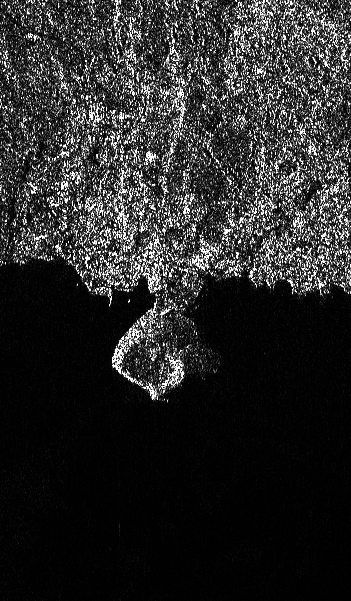

In [80]:
SARProcessing.sar2gray(complex_image, p_quantile = 0.95)

# Speckle filtering

- Mean filter
- Origianl Lee Filter
- Median filter

In [86]:
descpek_mean_9 = SARProcessing.speckle_mean_filter(abseloute_image,[9,9]);
descpek_lee_9 = SARProcessing.speckle_lee_filter(abseloute_image,[9,9]);
descpek_median_9 = SARProcessing.speckle_median_filter(abseloute_image,[9,9]);
descpek_lee_15 = SARProcessing.speckle_lee_filter(abseloute_image,[15,15]);

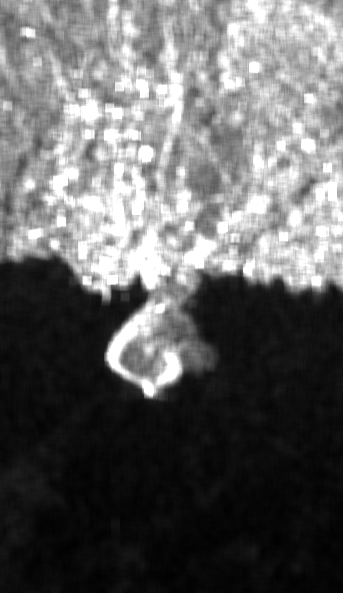

In [82]:
SARProcessing.sar2gray(descpek_mean_9, p_quantile = 0.95)

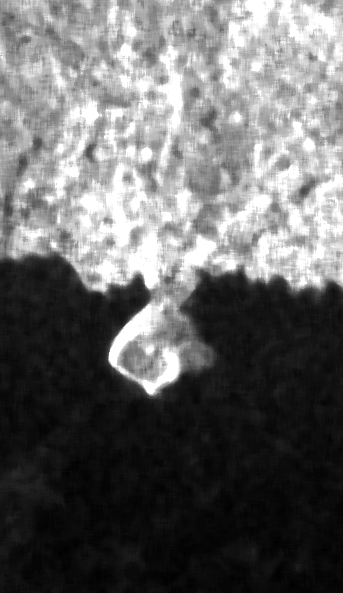

In [83]:
SARProcessing.sar2gray(descpek_median_9, p_quantile = 0.95)

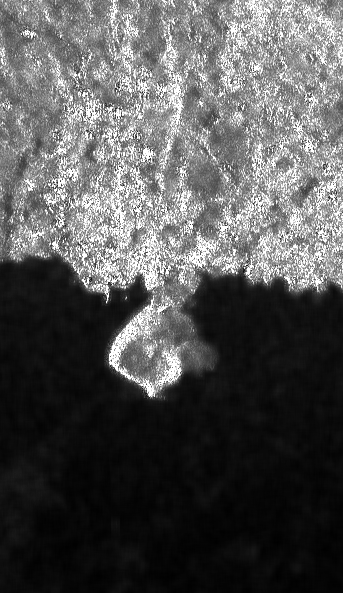

In [17]:
SARProcessing.sar2gray(descpek_lee_9, p_quantile = 0.95)

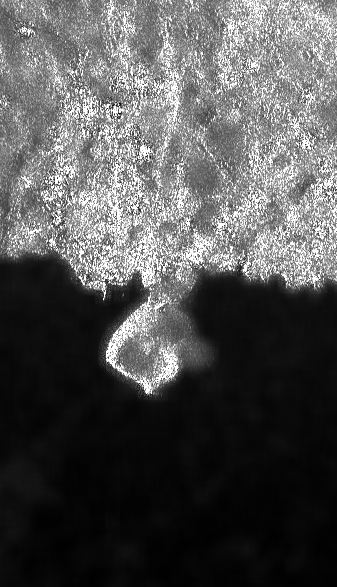

In [87]:
SARProcessing.sar2gray(descpek_lee_15, p_quantile = 0.95)

In [23]:
@benchmark SARProcessing.speckle_mean_filter(abseloute_image,[9,9]) samples = 40

BenchmarkTools.Trial: 40 samples with 1 evaluation.
 Range (min … max):  31.967 ms … 43.262 ms  ┊ GC (min … max): 19.55% … 37.24%
 Time  (median):     34.390 ms              ┊ GC (median):    19.21%
 Time  (mean ± σ):   36.080 ms ±  3.437 ms  ┊ GC (mean ± σ):  23.79% ±  6.45%

       ▁   █                                                   
  ▄▄▄▁▁█▄▄▄█▇▇▄▇▇▄▁▄▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▄▁▁▄▄▇▁▄▄▁▄▁▄▁▁▁▁▇▁▁▁▄▁▄ ▁
  32 ms           Histogram: frequency by time        43.3 ms <

 Memory estimate: 148.97 MiB, allocs estimate: 406803.

In [25]:
@benchmark SARProcessing.speckle_lee_filter(abseloute_image,[9,9]) samples = 40

BenchmarkTools.Trial: 40 samples with 1 evaluation.
 Range (min … max):  42.386 ms … 54.441 ms  ┊ GC (min … max): 14.53% … 26.77%
 Time  (median):     45.098 ms              ┊ GC (median):    14.52%
 Time  (mean ± σ):   46.791 ms ±  3.513 ms  ┊ GC (mean ± σ):  18.58% ±  5.41%

        █▃▃▃██    ▃ ▃                   ▃  █   ▃               
  ▇▇▁▁▇▇██████▇▁▇▁█▇█▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▇▁█▇▇▁█▁▁▁▇▁▁▁▁▇▁▁▁▇ ▁
  42.4 ms         Histogram: frequency by time        54.4 ms <

 Memory estimate: 148.97 MiB, allocs estimate: 406803.

In [26]:
@benchmark SARProcessing.speckle_median_filter(abseloute_image,[9,9]) samples = 40

BenchmarkTools.Trial: 22 samples with 1 evaluation.
 Range (min … max):  230.557 ms … 249.195 ms  ┊ GC (min … max): 5.86% … 5.16%
 Time  (median):     235.544 ms               ┊ GC (median):    7.52%
 Time  (mean ± σ):   235.549 ms ±   4.519 ms  ┊ GC (mean ± σ):  7.45% ± 1.62%

  ▃█   ▃          ▃       ▃▃                                     
  ██▁▁▇█▁▁▇▁▇▁▁▁▁▁█▇▇▁▇▁▁▁██▁▁▁▁▁▁▁▇▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇ ▁
  231 ms           Histogram: frequency by time          249 ms <

 Memory estimate: 291.74 MiB, allocs estimate: 610202.

## Benchmark filters

In [ ]:
leetimes = Vector{Float64}()
meantimes = Vector{Float64}()
mediantimes = Vector{Float64}()
filtersizes = Vector{Float64}()



for sizes in [3,5,7,9,11,13,15,17,19,21]
    filtersize= [sizes,sizes]
    lee = @benchmark SARProcessing.speckle_lee_filter(abseloute_image,$filtersize) samples = 10
    means = @benchmark SARProcessing.speckle_mean_filter(abseloute_image,$filtersize) samples = 10
    medians = @benchmark SARProcessing.speckle_median_filter(abseloute_image,$filtersize) samples = 10
    push!(leetimes,mean(lee.times))
    push!(meantimes,mean(means.times))
    push!(mediantimes,mean(medians.times))
    push!(filtersizes,sizes)
end

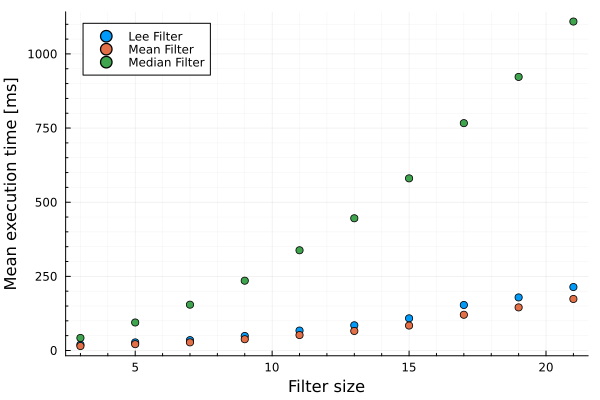

In [77]:
using Plots
#This needs the Plots package installed.
plot(filtersizes, leetimes./(10^(6)), seriestype=:scatter, minorgrid=true,label="Lee Filter")
plot!(filtersizes, meantimes./(10^(6)), seriestype=:scatter, minorgrid=true,label="Mean Filter")
plot!(filtersizes, mediantimes./(10^(6)), seriestype=:scatter, minorgrid=true,label="Median Filter")
xlabel!("Filter size")
ylabel!("Mean execution time [ms]")